<a href="https://colab.research.google.com/github/SebinLee/Speech_Emotion_Recognition/blob/main/Speech_Emotion_Recognition_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the RAVDESS Emotional Speech Audio Dataset
For this model we used RAVDESS Emotional speech audio from Kaggle: https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio

Files
This portion of the RAVDESS contains 1440 files:

60 trials per actor x 24 actors = 1440
The data was made by 12 female, 12 male professional actors vocalizing two lexically-matched statements in a neutral North American accent.
Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions.
Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

In [ ]:
# If you use Colab, run this cell to install additional dependencies
# Install addtional dependencies
!pip3 install torch torchvision torchaudio
!pip3 install fastai --upgrade
!pip3 install fastcore
!pip3 install sounddevice
!sudo apt-get install libportaudio2

In [ ]:
# If you use Colab, run this cell
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Add Google Drive path to import local class
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/SpeechEmotionRecognition')
file_root = "/content/drive/My Drive/Colab Notebooks/SpeechEmotionRecognition"

In [1]:
# If you use local machine, run this cell
file_root = "/Users/sebinlee/Desktop/Github/SERPractice"

In [2]:
import matplotlib.pyplot as plt                       # Allows you to plot things
import librosa                                        # Python package for music and audio analysis
import librosa.display                                # Allows you to display audio files 
import os                                             # The OS module in Python provides a way of using operating system dependent functionality.
import scipy.io.wavfile                               # Open a WAV files
import numpy as np                                    # Used for working with arrays
import fastai
import glob                                           # Used to return all file paths that match a specific pattern
import fetch_label                                    # Local class
# Please note: the fetch_label import references a local class that you should define in your local computer. 
# @maheshwari-nikhil on GitHub made this class that you can use: https://github.com/maheshwari-nikhil/emotion-recognition/blob/master/fetch_label.py
label = fetch_label.FetchLabel()                      # Retrieve files/pathnames matching a specified pattern

# Import fast AI
from fastai import *                                 
from fastai.vision.all import *
from fastai.vision.data import ImageDataLoaders
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.vision.widgets import *

# Live Audio
import struct                                         # Unpack audio data into integers
import time
from tkinter import TclError
from scipy.fftpack import fft                         # Imports all fft algorithms 
import sounddevice
from scipy.io.wavfile import write

/Users/sebinlee/miniforge3/envs/ml38/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: dlopen(/Users/sebinlee/miniforge3/envs/ml38/lib/python3.8/site-packages/torchvision/image.so, 0x0006): symbol not found in flat namespace '__ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE'
  warn(f"Failed to load image Python extension: {e}")


In [3]:
# Global var for directories
AUDIO_FOLDER = os.path.join(file_root, "audio-dataset/*")
OUTPUT_FOLDER_TRAIN = os.path.join(file_root, "Development/output_folder_train/")
OUTPUT_FOLDER_TEST = os.path.join(file_root, "output_folder_test/")

# Plotting audio file

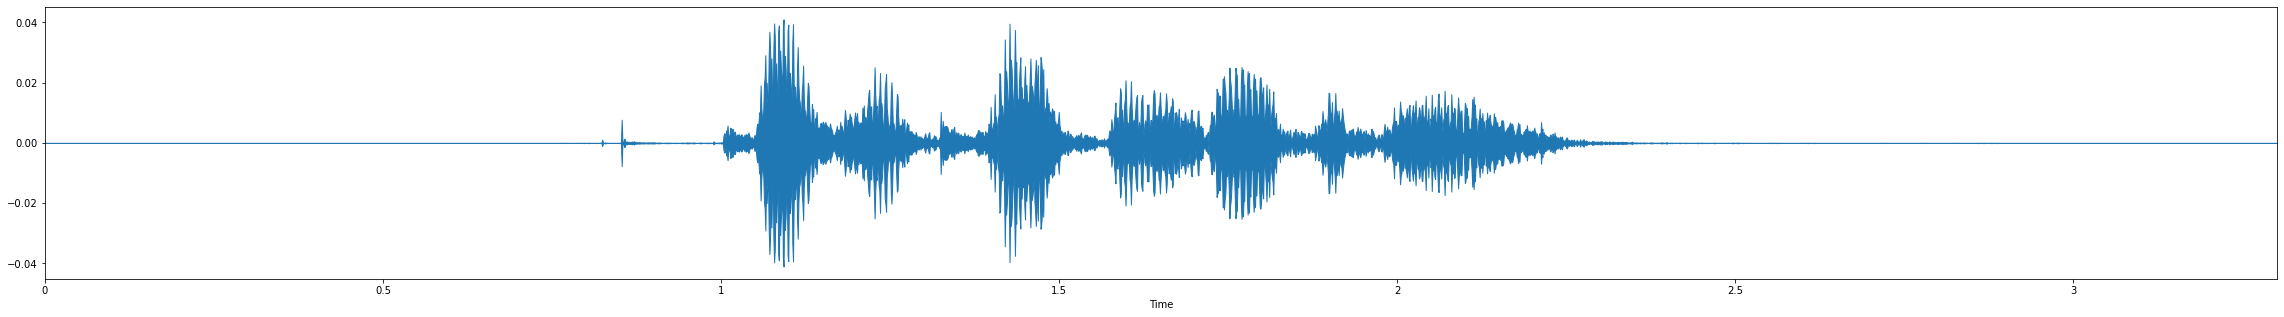

In [4]:
# Import one audio file with librosa
data, sampling_rate = librosa.load(os.path.join(file_root,'audio-dataset/Actor_01/03-01-01-01-01-01-01.wav'))
plt.figure(figsize=(40, 5))                           # Shape of audio figure
librosa.display.waveplot(data, sr=sampling_rate)      # Show audio

In [5]:
# Load in audio file
y, sr = librosa.load(os.path.join(file_root,'audio-dataset/Actor_01/03-01-01-01-01-01-01.wav'))
yt,_=librosa.effects.trim(y)                          # Trim leading and trailing silence from an audio signal.

/Users/sebinlee/miniforge3/envs/ml38/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/sebinlee/miniforge3/envs/ml38/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


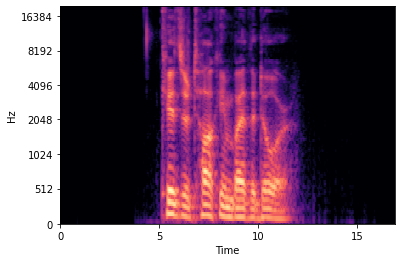

In [6]:
# Converting the sound clips into a melspectogram with librosa
# A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale
audio_spectogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)

# Convert a power spectrogram (amplitude squared) to decibel (dB) units with power_to_db
audio_spectogram = librosa.power_to_db(audio_spectogram, ref=np.max)

# Display the spectrogram with specshow
librosa.display.specshow(audio_spectogram, y_axis='mel', fmax=20000, x_axis='time')

# Extract features from audio using librosa

In [7]:
for actor in glob.glob(AUDIO_FOLDER):               # Loop through each actor in the data set 
  for name in glob.glob(actor +'/*'):               # Go through each audio file in each of the actors datasets
    print(name[-18:-16])                            # Sanity check: Check for name of file
    emotion = label.get_emotion(name[-24:])         # From audio file naming convention get the emotion of the data
    print(emotion)                                  # Sanity check: Check emotion name

05
female_angry
06
female_fearful
06
female_fearful
05
female_angry
07
female_disgusted
04
female_sad
04
female_sad
07
female_disgusted
08
female_surprised
08
female_surprised
03
female_happy
03
female_happy
02
female_calm
01
female_neutral
02
female_calm
03
female_happy
03
female_happy
02
female_calm
02
female_calm
01
female_neutral
06
female_fearful
05
female_angry
05
female_angry
06
female_fearful
04
female_sad
07
female_disgusted
07
female_disgusted
04
female_sad
08
female_surprised
08
female_surprised
02
female_calm
01
female_neutral
02
female_calm
03
female_happy
03
female_happy
07
female_disgusted
04
female_sad
04
female_sad
07
female_disgusted
05
female_angry
06
female_fearful
06
female_fearful
05
female_angry
08
female_surprised
08
female_surprised
04
female_sad
07
female_disgusted
07
female_disgusted
04
female_sad
06
female_fearful
05
female_angry
05
female_angry
06
female_fearful
08
female_surprised
08
female_surprised
01
female_neutral
02
female_calm
02
female_calm
03
femal

In [8]:
# Dictionary with the numerical value that corresponds to each emotion
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [18]:
counts = {}
for actor in glob.glob(AUDIO_FOLDER):               # Loop through each actor in the data set 
  for audioFile in glob.glob(actor +'/*'):          # Loop over each audio file in that directory
    
    emotion=dicts[audioFile[-18:-16]]               # Returns numbers from the audio file name, using the dictionary mapping each numerical value to emotions 

    # Logic to split up test and train data
    save_path = ""
    if count % 8 == 0 :
      save_path = OUTPUT_FOLDER_TEST + emotion
    else :
      save_path = OUTPUT_FOLDER_TRAIN + emotion

    if os.path.exists(save_path) == False :
      os.mkdir(save_path)
      
    # Convert to melspectrogram
    y, sr = librosa.load(audioFile)                 # Load the file with librosa
    yt,_=librosa.effects.trim(y)                    # Trim leading and trailing silence from an audio signal.          
    y=yt

    # Creare spectrogram from audio file
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time')
    
    # Logic to split up test and train data
    count = counts.get(emotion, 1)
    p = os.path.join(save_path, "{}{}.jpg".format(emotion, str(count).zfill(6)))         
    counts[emotion] = count + 1

    # Save to the aforementioned path
    plt.savefig(p)
    print("Done!")
  print("{} Done!".format(actor.split("/")[-1]))                                                         


Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


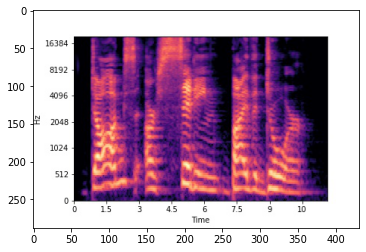

In [ ]:
# Print one image from sorted array file
img = plt.imread('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/angry/000001.jpeg')   
plt.imshow(img)

In [ ]:
train_path = Path("/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data")
valid_path = Path("/Users/kristinaarezina/Desktop/output_folder_test")
main_path = Path('/Users/kristinaarezina/Desktop/audio-dataset')

# List all sentiment groups 
train_path.ls()

(#10) [Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/happy'),Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/.DS_Store'),Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/sad'),Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/models'),Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/calm'),Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/fearful'),Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/neutral'),Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/angry'),Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/surprised'),Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/disgust')]

In [ ]:
# Create from imagenet style dataset in path with train and valid subfolders (or provide valid_pct)
dls = ImageDataLoaders.from_folder(train_path, valid_pct=0.2, seed=42, num_workers=0)
dls.valid_ds.items[:10]

[Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/happy/000037.jpeg'),
 Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/disgust/000024.jpeg'),
 Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/happy/000091.jpeg'),
 Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/fearful/000039.jpeg'),
 Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/happy/000019.jpeg'),
 Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/sad/000027.jpeg'),
 Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/neutral/000034.jpeg'),
 Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/disgust/000042.jpeg'),
 Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/disgust/000041.jpeg'),
 Path('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/happy/000063.jpeg')]

In [ ]:
# Showcase the sentiment categories 
dls.vocab

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

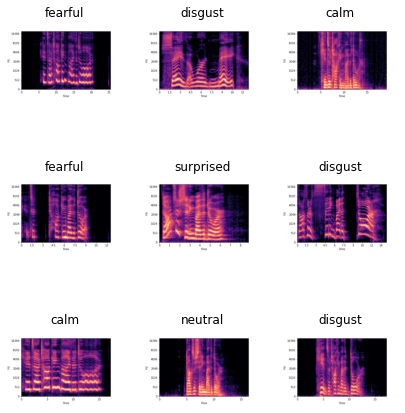

In [ ]:
# See what a sample of a batch looks like
dls.show_batch(figsize=(7,8))

Minimum/10: 5.75e-03, steepest point: 2.51e-03


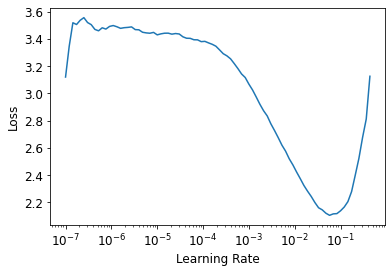

In [ ]:
# This method creates a Learner object from the data object and model inferred from it with the backbone given in base_arch.
# ResNet-34 Pre-trained Model for PyTorch
learn = cnn_learner(dls, models.resnet34, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

# Find optimum learning rate (the steepest point)
lr_min, lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Sanity Check

In [ ]:
print('learn.data.vocab', learn.dls.vocab)

learn.data.vocab ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [ ]:
# Train (fit) using the optimum learning rate
learn.fit(10, float(f"{lr_steep:.2e}"))

epoch,train_loss,valid_loss,accuracy,time
0,2.230757,4.507146,0.240506,21:25
1,1.490977,4.392455,0.246835,16:35
2,1.090137,4.781416,0.253165,18:52
3,0.831672,4.011696,0.310127,20:10
4,0.664482,3.475130,0.341772,18:28
5,0.532284,3.355100,0.341772,10:26
6,0.432947,3.081478,0.291139,09:03
7,0.352644,2.991185,0.341772,09:27
8,0.291086,3.154719,0.367089,10:24
9,0.241855,3.256023,0.367089,13:38


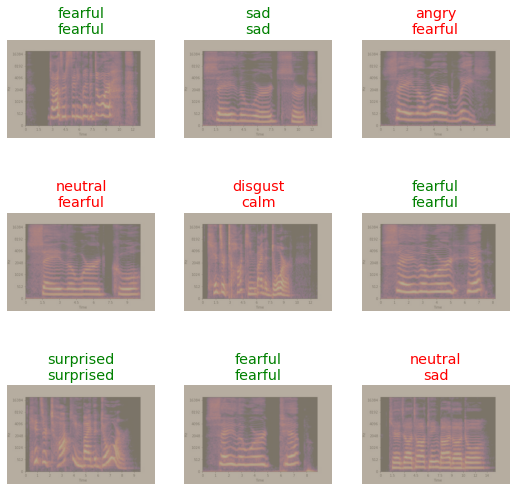

In [ ]:
# Plotting The losses for training and validation
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

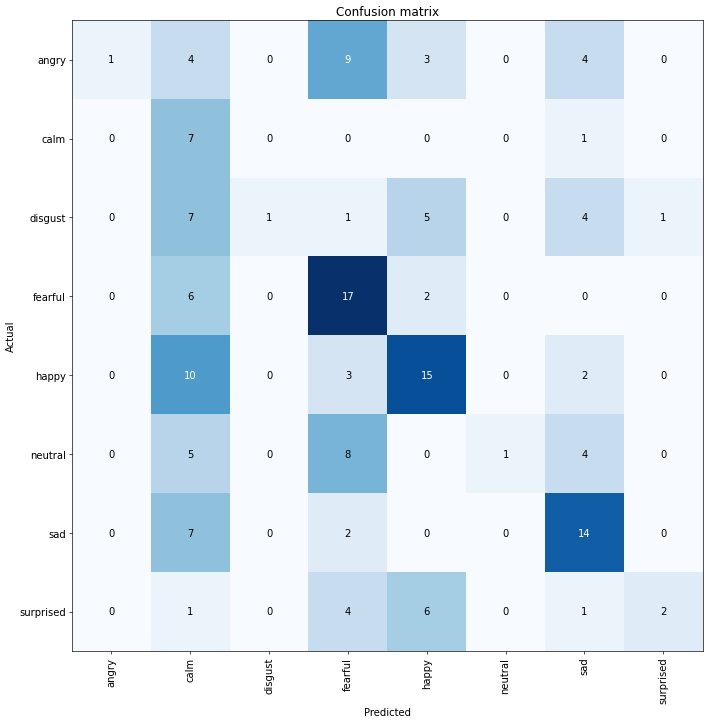

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.freeze()

In [ ]:
learn.export('speech_02.pkl')

# Live Audio

In [ ]:
model = load_learner('/Users/kristinaarezina/Development/OG_output_folder_train/sorted_data/speech_02.pkl')
print('model loaded')

In [ ]:
fs=44100
second=3

for i in range(1, 10):
  count = i
  print("Recording")
  record_voice = sounddevice.rec(int(second * fs), samplerate=fs, channels=2)
  sounddevice.wait()
  write(Path('/Users/kristinaarezina/Development/Live/output', '{}.wav'.format(str(count))), fs, record_voice)

  # Load in audio file
  y, sr = librosa.load(Path('/Users/kristinaarezina/Development/Live/output', '{}.wav'.format(str(count))))

  yt,_=librosa.effects.trim(y)

  # Converting the sound clips into a melspectogram with librosa
  # A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale
  audio_spectogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)

  # Convert a power spectrogram (amplitude squared) to decibel (dB) units with power_to_db
  audio_spectogram = librosa.power_to_db(audio_spectogram, ref=np.max)

  # Display the spectrogram with specshow
  librosa.display.specshow(audio_spectogram, y_axis='mel', fmax=20000, x_axis='time')

  p = os.path.join('/Users/kristinaarezina/Development/live_images', "{}.jpg".format(str(count)))
  plt.savefig(p)

  # Print one image from sorted array file
  is_angry, _, probs = model.predict(img)
  print("Is this angry?", is_angry)